# Invistico Airlines Project: 1st case
**Objectives** \
*1st case* \
Invistico Airlines is interested in learning if a better inflight entertainment experience leads to higher customer satisfaction. They would like the construction and evaluation of a model that predicts whether a future customer would be satisfied with their services given previous customer feedback about their inflight entertainment experience. 

**Data** \
The data is sample size of survey responses from 129,880 customers. It includes data points such as satisfaction, class, flight distance, and inflight entertainment, among others. It is an in-house product.

**Deliverables** \
Models: binomial logistic regression, decision tree, random forest, XGBoost.  
(Since this project is a portfolio addition, the models are predetermined. Since this is a labelled data set, all models qualify as supervised.) Python Jupyter notebooks were used for all coding.

*1st case*: **Binomial logistic regression model** (1st notebook)\
In the first case, the airline is interested in <u>learning</u> whether a better *inflight entertainment* experience leads to higher customer *satisfaction*. The outcome (dependent y variable) is `Satisfaction` a categorical Boolean variable (yes or no). The selected predicting (independent X variable) is `Inflight entertainment`. (In point of fact, many of the variables in the data set could be employed for the model. However, the results from the following tree-based models suggest that `Inflight entertainment` is the most predictive variable.)

For this task, a binomial logistic model (rather than linear) is appropriate. Binomial logistic regression is a statistical technique that models the probability of an event (*satisfaction*) based on one (or more) independent variables (*inflight entertainment*). The outcome must be a binary classification (satisfaction/dissatisfaction).   
All code is located at: https://github.com/izsolnay/Invistico_Airlines_Python

#### Import packages

In [1]:
# Import standard operational packages
import numpy as np
import pandas as pd

# Import preprocessing, modeling, and evaluation packages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, classification_report

# Import visualization package
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score

# Set Jupyter to display all of the columns (no redaction)
pd.set_option('display.max_columns', None)

In [2]:
# Import data; create df
df0 = pd.read_csv('Invistico_Airline.csv', on_bad_lines='skip')
df0.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


## PART I: BASIC EDA
Examine data for what it does and does not say

In [3]:
# Investigate df
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [4]:
df0.columns

Index(['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [5]:
# Get basic statistics
df0.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


#### Initial summary
df has 22 variables (cols) and 129880 observations (rows)<br>
columns can be divided: 
- 4 categorical object: 'satisfaction', 'Customer Type', 'Type of Travel', 'Class'
- 17 discrete int64: 'Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes'
- 1 continuous float64: 'Arrival Delay in Minutes' - not immediately evident why this not the same dtype as Departure Delay

Target variable will be satisfaction, because goal is to construct and evaluate a model that predicts whether a future customer would be *satisfied* with their services given previous customer feedback about their flight experience.
Since Boolean, will use Inflight entertainment as X for this model, but, really, all would be affecting. Target variable will need to be encoded.

- Arrival Delay in Minutes is missing 393 entries 
- Scale for quality columns 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding' is 1-5
- Age ranges from 7 > 85 yrs old; with a median age of 40
- Departure Delay in Minutes has a min delay of 0 mins, and a max delay of 1592(~ 26.53hrs)
- Arrival Delay in Minutes has a min delay of 0 mins, and a max delay of 1584(26.4hrs)	

#### Output unique values 
Further investigate categorical variables: 'satisfaction', 'Customer Type', 'Type of Travel', 'Class'

In [6]:
print('satisfaction')
print(df0['satisfaction'].unique())
print('Customer Type')
print(df0['Customer Type'].unique())
print('Type of Travel')
print(df0['Type of Travel'].unique())
print('Class')
print(df0['Class'].unique())

satisfaction
['satisfied' 'dissatisfied']
Customer Type
['Loyal Customer' 'disloyal Customer']
Type of Travel
['Personal Travel' 'Business travel']
Class
['Eco' 'Business' 'Eco Plus']


In [7]:
# Check class balance for target variable: satisfaction
print (df0['satisfaction'].value_counts())
print (df0['satisfaction'].value_counts(normalize=True))

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64
satisfaction
satisfied       0.547328
dissatisfied    0.452672
Name: proportion, dtype: float64


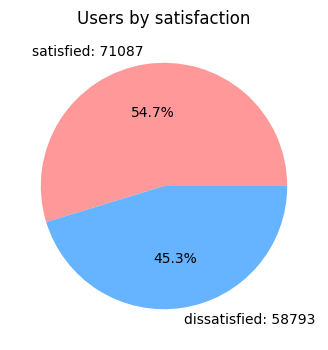

In [8]:
# Create pie chart for satisfaction category
fig = plt.figure(figsize=(4,4))
data=df0['satisfaction'].value_counts()

plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',  # f string allows for embedded expressions inside curly braces 
                f'{data.index[1]}: {data.values[1]}'], # combines the index & value of the 1st element in the data
        autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'] # 'autopct' parameter formats the percentage shown on each slice
        )                                                # %% displays a percentage sign % in the formatted string
plt.title('Users by satisfaction');

In [9]:
# Check class balance for Customer Type
print (df0['Customer Type'].value_counts())
print (df0['Customer Type'].value_counts(normalize=True))

Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64
Customer Type
Loyal Customer       0.816908
disloyal Customer    0.183092
Name: proportion, dtype: float64


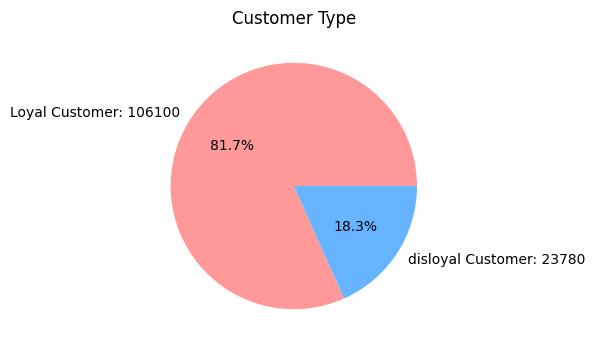

In [10]:
# Create pie chart for Customer Type category
fig = plt.figure(figsize=(4,4))
data=df0['Customer Type'].value_counts()

plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',  # Adding the 1st category
                f'{data.index[1]}: {data.values[1]}'],  # Adding the 2nd category
        autopct='%1.1f%%', colors=['#ff9999', '#66b3ff']  # Adding colors for two wedges
        )
plt.title('Customer Type');

In [11]:
# Check class balance for Type of Travel
print (df0['Type of Travel'].value_counts())
print (df0['Type of Travel'].value_counts(normalize=True))

Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64
Type of Travel
Business travel    0.690584
Personal Travel    0.309416
Name: proportion, dtype: float64


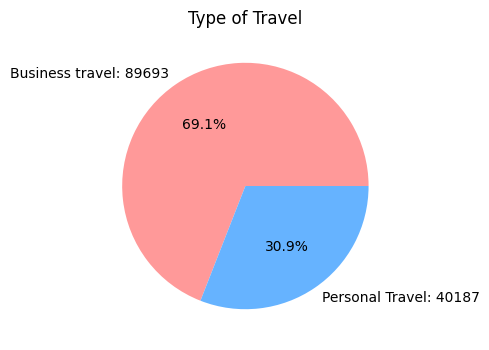

In [12]:
# Create pie chart for Customer Type category
fig = plt.figure(figsize=(4,4))
data=df0['Type of Travel'].value_counts()

plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%', colors=['#ff9999', '#66b3ff']
        )
plt.title('Type of Travel');

In [13]:
# Check class balance for Class
print (df0['Class'].value_counts())
print (df0['Class'].value_counts(normalize=True))

Class
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64
Class
Business    0.478596
Eco         0.448945
Eco Plus    0.072459
Name: proportion, dtype: float64


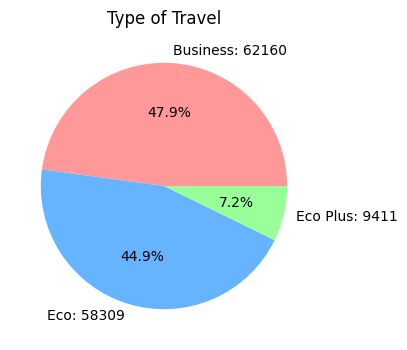

In [14]:
# Create pie chart for Class category
fig = plt.figure(figsize=(4, 4))
data = df0['Class'].value_counts()

plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}',
                f'{data.index[2]}: {data.values[2]}'],  # Adding the third category
        autopct='%1.1f%%',
        colors=['#ff9999', '#66b3ff', '#99ff99']  # Adding color for the third wedge
        )

plt.title('Type of Travel');

#### Summary
For this task, a binomial logistic model (rather than linear) is appropriate. Binomial logistic regression is a statistical technique that models the probability of an event (*satisfaction*) based on one (or more) independent variables (*inflight entertainment*). The outcome must be binary (satisfaction/dissatisfaction). 'Inflight entertainment' will be the independent X which will help predict(logistic) whether the person is satisfied (1) or dissatisfied (0) The model will calculate a probability that given a particular value of Inflight entertainment(X), the person is satisfied(y).

**`satisfaction`**: 2 values, will be used as target variable (y)
- satisfied       71087 (~0.55%)
- dissatisfied    58793 (~0.45%)

`Customer Type`: 2 values
- Loyal Customer        106100 (~0.82%)
- disloyal Customer     23780 (~0.18%)

`Type of Travel`: 2 values
- Business travel    89693 (~0.69%)
- Personal Travel    40187 (~0.31%)

`Class`: 3 values
* Business    62160 (~0.48%)
* Eco         58309 (~0.45%)
* Eco Plus     9411 (~0.072%)

`'satisfaction'` will need to be encoded to plot reg plot later    
`'Customer Type'`, `'Type of Travel'`, and `'Class'` for will need to be encoded for ML models

#### Clean and Transform Data
Logistic regression requires no missing values – so, be tidy, even if the column won’t be used in final regression\
Also, as can be seen below:
- There are only a small % of missing values (393 out of the total of 129,880)
- Arrival Delay in Minutes might impact the relationship between entertainment and satisfaction

In [15]:
# Check for missing values
print(df0.isnull().sum())
df0.shape

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64


(129880, 22)

In [16]:
# Drop nas, create new df
# Set the axis=0 for rows containing missing values (1 for columns)
df = df0.dropna(axis=0).reset_index(drop = True) #reset_index = True to avoid a SettingWithCopy warning later in nbk
df.isnull().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [17]:
df.shape

(129487, 22)

In [18]:
# Check for duplicates
df.duplicated().sum()

0

In [19]:
# Rename satisfaction > Satisfaction, because it bugs me
df = df.rename(columns={'satisfaction': 'Satisfaction'})
df.columns

Index(['Satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [20]:
# Retype Inflight entertainment as continuous float
df = df.astype({'Inflight entertainment': float})
df.dtypes

Satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment               float64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

#### Encode data

In [21]:
# Convert categorical satisfaction into binary numerics
df['Satisfaction'] = df['Satisfaction'].map({'satisfied': 1, 'dissatisfied': 0})

In [22]:
# Check class balance for target variable: satisfaction
print (df['Satisfaction'].value_counts())
print (df['Satisfaction'].value_counts(normalize=True))

Satisfaction
1    70882
0    58605
Name: count, dtype: int64
Satisfaction
1    0.547406
0    0.452594
Name: proportion, dtype: float64


Results:\
Satisfaction is now a discrete binary int: 0 or 1
- satisfied 70882 (~0.55%) = 1
- dissatisfied 58605 (~0.45%) = 0
- There are 129487 observations (rows). None are missing values.

In [23]:
# Export the new df
df.to_csv('transformed_invistico.csv', index=0)

In [24]:
# Check new csv was created
df = pd.read_csv('transformed_invistico.csv')
df.head()

,Satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4.0,2,3,3,0,3,5,3,2,0,0.0
1,1,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2.0,2,3,4,4,4,2,3,2,310,305.0
2,1,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0.0,2,2,3,3,4,4,4,2,0,0.0
3,1,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4.0,3,1,1,0,1,4,1,3,0,0.0
4,1,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3.0,4,2,2,0,2,4,2,5,0,0.0


## PART II: Build a binomial logistic regression model

### Prepare data for modelling
Split the data into: 
- features and target variable
- training data(75%) and test data(25%)
- no need to stratify, because data set is balanced
- set a random seed so work can be reproduced (42)

In [25]:
# Subset independent X and dependent y
X = df[['Inflight entertainment']]
y = df['Satisfaction']

In [26]:
# Display balance of dependent y variable and verify is binary as required for a logistic regression
y.value_counts(normalize=True)

Satisfaction
1    0.547406
0    0.452594
Name: proportion, dtype: float64

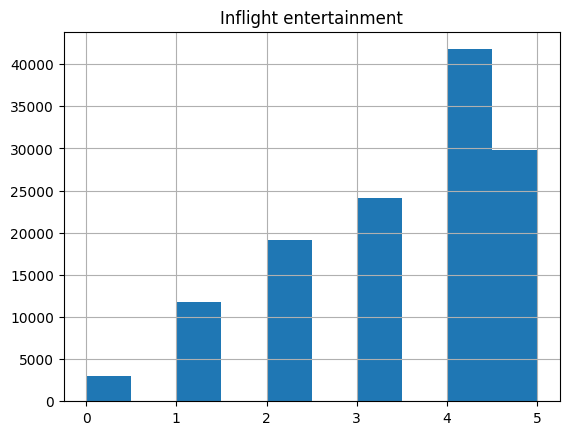

In [27]:
# Verify independent variable is not binary
X.hist();

- Independent X variable is a float with 5 values, with left skew
- Dependent y variable is a Boolean value with a healthy ~55/45% ratio
- No need to stratify or scale because data set is balanced

In [28]:
# Split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
# Verify shape of splits
print(X_train.shape) # This will be the total # of predictions on the train data
print(X_test.shape) # This will be the total # of predictions on the test data
print(y_train.shape)
print(y_test.shape) 

(90640, 1)
(38847, 1)
(90640,)
(38847,)


In [30]:
# Check balance of training set
y_train.value_counts()

Satisfaction
1    49674
0    40966
Name: count, dtype: int64

In [31]:
# Check balance of test set
y_test.value_counts()

Satisfaction
1    21208
0    17639
Name: count, dtype: int64

#### Build and plot logistic regression classification model (clf)

In [32]:
# Instantiate and fit the model
log_clf = LogisticRegression().fit(X_train,y_train)

In [33]:
# Get coefficients (parameter and intercept [betas]) for regplot
print(log_clf.coef_)
print(log_clf.intercept_)

[[0.99751462]]
[-3.19355406]


Model has a coef (parameter estimate) 0.99751462(β1) and intercept -3.19355406(β̂0)

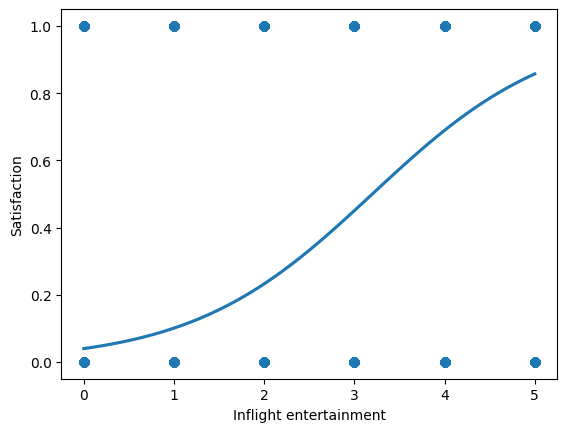

In [34]:
# Plot model and data with a 95% confidence band using the regplot() function
sns.regplot(x='Inflight entertainment', y='Satisfaction', data=df, logistic=True, ci=None); 
# logistic=True, because logitic model, not linear
# ci= function specify the confidence interval for the regression estimate. None = no confidence band
# Shows the same curve without the ci = (but, takes forever)

#### Results and evaluation
- get predictions on testing data – because not carrying forward
- get metrics: accuracy, precision, recall, and F1 score
- create confusion matrix
- create ROC curve
- create AUC

In [35]:
# Use the trained model to make predictions on the test set
# Save predictions
y_pred = log_clf.predict(X_test)
print(y_pred)

[1 0 0 ... 0 0 0]


In [36]:
# Use predict_proba to output a probability
log_clf.predict_proba(X_test)

array([[0.14258068, 0.85741932],
       [0.55008402, 0.44991598],
       [0.89989329, 0.10010671],
       ...,
       [0.89989329, 0.10010671],
       [0.76826225, 0.23173775],
       [0.55008402, 0.44991598]])

The predict function works by assuming a threshold of 0.5
- So if MLE predicts a value >= 0.5, the predict function will label that observation a 1
- If MLE predicts a value < 0.5, the predict function will label that observation a 0

Maximum likelihood estimation, or MLE, is a technique for estimating the beta parameters that maximize the likelihood of the model producing the observed data. Likelihood = the probability of observing the actual data given some set of beta parameters.

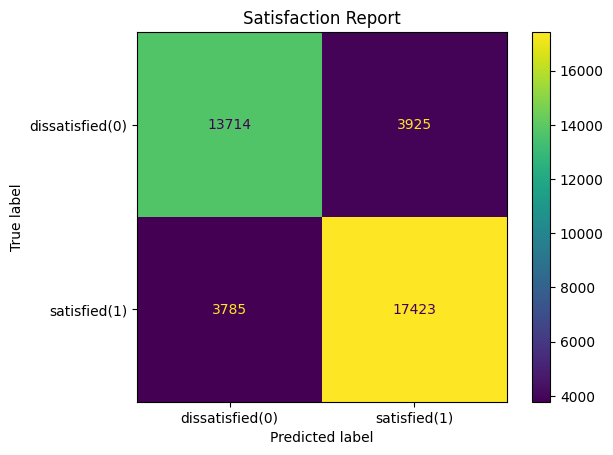

In [37]:
# Create confusion matrix to visualize how accurate classifier is at predicting the labels for a categorical variable
# Calculate the values for each quadrant in the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels = log_clf.classes_) # clf.classes_ (classifications)

# Visualize confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=['dissatisfied(0)', 'satisfied(1)']) #display_labels = clf.classes_

log_disp.plot()
plt.title('Satisfaction Report');

*Legend*
- True label (y_test): actual labels of the holdout sample
- Predicted label (y_pred): predicted labels (satisfied/dissatisfied [clf.classes_]) on the holdout test sample

Since this is a binomial logistic regression, there are only two labels, 0 and 1
- 0 = the person was labeled as dissatisfied for that observation
- 1 = a person was labeled as satisfied for that observation

*Translation*
- True negatives(UL): # of people that were dissatisfied(0) that the model accurately predicted as dissatisfied(0) = 13714
- True positives(LR): # of people that were satisfied(1) that the model accurately predicted were satisfied(1) = 17423
  
- False positives(UR)/ Type I Errors: # of people that were dissatisfied(0) that the model inaccurately predicted were satisfied(1) = 3925
- False negatives(LL)/Type II Errors: # of people that were satisfied(1) that the model inaccurately predicted were dissatisfied(0) = 3785

Immediately seen from the model is a med-high proportion of true positives and true negatives (where the matrix accurately predicted that the customer would be satisfied or dissatisfied, respectively) to false positives and false negatives.

There is also a proportional relationship between false positives and false negatives (where the matrix inaccurately predicted that the customer would be satisfied or dissatisfied, respectively.

In [38]:
# Create table of results for metrics
# precision_score(y_test,y_pred) = Y values in holdout testing dataset &  Y values that model predicted from the X values in holdout test dataset 
result_table = pd.DataFrame({'Model': ['Logistic regression'],
                      'Precision': ['%.6f' % precision_score(y_test, y_pred)],
                      'Recall': ['%.6f' % recall_score(y_test, y_pred)],
                      'Accuracy': ['%.6f' % accuracy_score(y_test, y_pred)],
                      'F1': ['%.6f' % f1_score(y_test, y_pred)]
                     },)
result_table

,Model,Precision,Recall,Accuracy,F1
0,Logistic regression,0.816142,0.821530,0.801529,0.818827


In [39]:
# Create classification_report
target_labels = ['dissatisfied', 'satisfied']
print(classification_report(y_test, y_pred, target_names = target_labels))

              precision    recall  f1-score   support

dissatisfied       0.78      0.78      0.78     17639
   satisfied       0.82      0.82      0.82     21208

    accuracy                           0.80     38847
   macro avg       0.80      0.80      0.80     38847
weighted avg       0.80      0.80      0.80     38847



**Precision**: measures the % of customers that are actually satisfied out of all the customers that have been predicted to be satisfied (# true positives(17423) / (# true positives(17423) + # false positives(3925))

*The good* \
This model has a precision score of 0.82, thus it is quite good at precisely predicting whether an airline customer will be satisfied (true positives), based on the inflight entertainment currently on offer. In an effort to be precise, the model also attempts to reduce the occurrences of incorrectly classifying people as satisfied when they are dissatisfied (false positives/Type I errors). 

*The bad* \
In its goal to be precise (not classify people as satisfied when they are dissatisfied), the algorithm can become more selective. A higher rate of precision may mean that more samples are classified as dissatisfied, when then are satisfied (false-negative/Type II errors). Thus, satisfied customers can be missed. 

The conclusion \
Because the airline is interested in learning if a new customer would be satisfied based on their current inflight entertainment, an 82% satisfaction rate is excellent. This is particularly true if the algorithm has even missed satisfied people.

**Recall**: measures the % of satisfied customers that the classifier correctly identified as satisfied out of all satisfied observations in the test set (21208). (# true positives(17423) / (# true positives(17423) + # false negatives(3785)) 

*The good* \
This model has a precision score of 0.82, thus it is quite good at correctly identifying whether the airline passenger will be satisfied, based on the inflight entertainment currently on offer, out of all customers who were tagged as satisfied (y_test = 21208 [17423 + 3785]). The model is also less likely miss people who are satisfied (to incorrectly classify people as dissatisfied who are satisfied (false-negative/Type II errors)).

*The bad* \
However, because the model is more sensitive to finding satisfied people, it can be prone to incorrectly categorizing people as satisfied (false-positives/Type-I error) when they are dissatisfied. 

The conclusion \
If the score were higher than 0.82 the airline may not want to put too much stock in their current inflight entertainment as a variable which predicts satisfaction – since some people would have been dissatisfied with it and they would not have been classified as such. The score of 0.82 (or 3925 missed people), may not weigh heavily.

**Accuracy** is the percentage of data points that were correctly classified out of all total predictions (# true positives(17423) + # true negatives(13714) / # total predictions(38847)). The model achieved an accuracy score of 0.80 which is quite good.

*The bad* \
Accuracy can be misleading if the data set is unbalanced. The algorithm could be poor at balancing false positive and false negatives because it does not account for the distribution of classes (satisfied/dissatisfied). It could be excellent at predicting one class (e.g., the majority) and being terrible at predicting the other (e.g., the minority) and return a very good accuracy score.

The conclusion \
Since this class was mostly balanced (21208 (1)/ 17639 (0)), an accuracy of 0.80 likely reflects a well balanced result.

**F1 Score** (the harmonic mean) balances precision (minimizing false positives or Type I errors) and recall (minimizing false negatives or Type II errors) performance, providing a single value for evaluation.<br>

The conclusion \
The combined F1 score of 0.82 is quite good. It means that the model is mostly effective at minimizing both type of errors. 


In [40]:
# Save results table as csv
result_table.to_csv('Satisfaction_Results.csv', index = False) # index = False to remove indexing row

In [41]:
# View the results
table = pd.read_csv('Satisfaction_Results.csv')
table.head()

,Model,Precision,Recall,Accuracy,F1
0,Logistic regression,0.816142,0.82153,0.801529,0.818827


### Plot ROC and AOC
Visualize the performance of the logistic regression classifier(clf)

**ROC curve (receiver operating characteristic curve)**  
- A ROC curse visualizes the performance of a classifier at different classification thresholds
- For binary classification: a classification threshold is a cutoff(point) for differentiating the positive class from the negative class
- y axis: True Positive Rate (Recall). The probability that model predicts a positive and it is negative (Sensitivity).
- X axis: False Positive Rate (= False Positives / (False Positives + True Negatives)). The probability that model predicts a negative and it is negative (Specificity)

**AUC (area under the ROC curve)** 
- The AUC score provides an aggregate measure of performance of the model at each threshold.

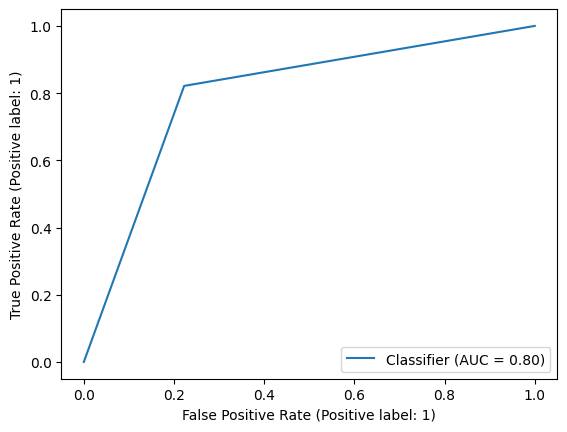

In [42]:
# Plot ROC curve
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

In [43]:
# Compute the AUC
roc_auc_score(y_test,y_pred)

0.7995056640589874

*ROC curve*    
The graph shows of pairs (true positive/false positive) across all possible classification thresholds (classification decisions) confirms that the model is quite good at classifying the data. The True Positive Rate is high and the False Positive Rate is low.

In the context of classification models, "across all possible classification thresholds" refers to the range of values that can be used to determine whether a sample is classified as belonging to a particular class (e.g., positive or negative).

*AUC scores*  
A model that has an AUC score of 0.0 is entirely wrong   
A model that has an AUC score of 1.0 is entirely correct   
A model that has an AUC score of < 0.5 is a model that performs worse than random classification   
A model that has an AUC score of > 0.5 is a model that performs better than random classification   

This model has an AUC score of ~80%, which suggests that the model has better overall performance (over all possible classification thresholds) in distinguishing between positive and negative classes.

The AUC evaluates the model's ability to discriminate between positive and negative instances across various thresholds.


## Results of Logistic regression
This model used the variable Inflight entertainment as the independent predictive variable to predicate whether the inflight entertainment experiences of previous customers would suggest future customer satisfaction. Previous customers rated their inflight entertainment experiences using a 1-5 rating scale. These customers had at the same time the opportunity to judge their overall satisfaction of their airline experience by selecting yes or no. This binary variable ‘satisfaction’ served as the dependent y variable for the logistic regressive model. The model predicts a strong and steady correlation between those who rated inflight entertainment highly and their general satisfaction with airline experience. The more customers said they enjoyed the inflight entertainment, the more likely they were to be satisfied.

On the whole, previous customers were fairly split in their satisfaction with their overall experience of the airline. ~55% of customers were satisfied and ~45% were dissatisfied. From the 38,847people in the test data, 21,208 were satisfied. Of those, the model captures 17423 - missing fewer than 4,000 satisfied customers. Since the goal of this project is to identify whether the inflight entertainment experiences of previous customers would suggest future customer satisfaction, this model is very good at correctly identifying satisfied customers and predicting their satisfaction based solely on their previous inflight entertainment experience. It scored ~82% on both recall and precision scores (with a f1 of ~82%), thus it has an equally high ability to identify satisfied or unsatisfied customers and an equally low chance of falsely identifying satisfied or unsatisfied customers (Type I and Type II errors). Further demonstrating this model's efficacy, it achieved an AUC score of ~80%, which suggests that it has better overall performance (over all possible classification thresholds) in distinguishing between positive and negative classes.

In an effort to identify even more satisfied customers based on their previous inflight entertainment experience, the model could be optimized based on recall score. However, if it is so tuned, it will become more sensitive to finding satisfied people and can be prone to incorrectly categorizing people as satisfied (false-positives/Type-I error) when they are dissatisfied, thereby giving a false impression of satisfaction. If, on the other hand, the airline would prefer to play it safe, the model could be optimized based on precision score. This would lead to the model attempting to reduce the occurrences of incorrectly classifying people as satisfied when they are dissatisfied (false positives/Type I errors). However, in its goal to be precise (not classify people as satisfied when they are dissatisfied), the algorithm can become more selective. A higher rate of precision may mean that more samples are classified as dissatisfied, when then are satisfied (false-negative/Type II errors). Thus, satisfied customers can be missed which could lead to the airline making changes where none are needed.
The success of the model indicates that the airline should focus attention on their inflight entertainment service, either leaving it as it is or continuing to improve it based on customer feedback. As the model scored an ~82% on accuracy, this is far better predictor than the ~55% satisfaction rating for the overall dataset.

### Continued in Invistico 2nd Case: decision trees